# NLTK

Natural Language Toolkit or [NLTK](https://www.nltk.org/) is an API to process text data. A lot of Natural Language Processing `NLP` tasks may be accomplished with NLTK. 

In [1]:
text = [
    'Data Science from Scratch: First Principles with Python',
    'Data Science for Business: What You Need to Know about Data Mining and Data-Analytic Thinking',
    'Practical Statistics for Data Scientists',
    'Build a Career in Data Science',
    'Python Data Science Handbook',
    'Storytelling with Data: A Data Visualization Guide for Business Professionals',
    'R for Data Science: Import, Tidy, Transform, Visualize, and Model Data',
    'Data-Driven Science and Engineering: Machine Learning, Dynamical Systems, and Control',
    'A Hands-On Introduction to Data Science',
    'Intro to Python for Computer Science and Data Science: Learning to Program with AI, Big Data and The Cloud',
    'How Finance Works: The HBR Guide to Thinking Smart About the Numbers',
    'The Intelligent Investor: The Definitive Book on Value Investing. A Book of Practical Counsel',
    'Introduction to Finance: Markets, Investments, and Financial Management',
    'Python for Finance: Mastering Data-Driven Finance',
    'The Infographic Guide to Personal Finance: A Visual Reference for Everything You Need to Know',
    'Personal Finance For Dummies',
    'Corporate Finance For Dummies',
    'Lords of Finance: The Bankers Who Broke the World',
    'Real Estate Finance & Investments',
    'Real Estate Finance and Investments Risks and Opportunities'
]

## Stop words

It is common to remove stop words from a corpus of documents. NLTK has some default and available stop words for different languages. Below, we show how to use the English stop words from NLTK with scikit's `CountVectorizer`.

In [2]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

stop_words = set(stopwords.words('english'))

vectorizer = CountVectorizer(binary=True, stop_words=stop_words)
X = vectorizer.fit_transform(text).todense()

bool_df = pd.DataFrame(X, columns=vectorizer.get_feature_names())

print(bool_df.shape)
bool_df.columns

(20, 74)


Index(['ai', 'analytic', 'bankers', 'big', 'book', 'broke', 'build',
       'business', 'career', 'cloud', 'computer', 'control', 'corporate',
       'counsel', 'data', 'definitive', 'driven', 'dummies', 'dynamical',
       'engineering', 'estate', 'everything', 'finance', 'financial', 'first',
       'guide', 'handbook', 'hands', 'hbr', 'import', 'infographic',
       'intelligent', 'intro', 'introduction', 'investing', 'investments',
       'investor', 'know', 'learning', 'lords', 'machine', 'management',
       'markets', 'mastering', 'mining', 'model', 'need', 'numbers',
       'opportunities', 'personal', 'practical', 'principles', 'professionals',
       'program', 'python', 'real', 'reference', 'risks', 'science',
       'scientists', 'scratch', 'smart', 'statistics', 'storytelling',
       'systems', 'thinking', 'tidy', 'transform', 'value', 'visual',
       'visualization', 'visualize', 'works', 'world'],
      dtype='object')

## Tokenization

NLTK can also tokenize words. Notice how characters such as `:` and `&` are separated into their own token?

In [3]:
import nltk

for title in text:
    print(nltk.word_tokenize(title))

['Data', 'Science', 'from', 'Scratch', ':', 'First', 'Principles', 'with', 'Python']
['Data', 'Science', 'for', 'Business', ':', 'What', 'You', 'Need', 'to', 'Know', 'about', 'Data', 'Mining', 'and', 'Data-Analytic', 'Thinking']
['Practical', 'Statistics', 'for', 'Data', 'Scientists']
['Build', 'a', 'Career', 'in', 'Data', 'Science']
['Python', 'Data', 'Science', 'Handbook']
['Storytelling', 'with', 'Data', ':', 'A', 'Data', 'Visualization', 'Guide', 'for', 'Business', 'Professionals']
['R', 'for', 'Data', 'Science', ':', 'Import', ',', 'Tidy', ',', 'Transform', ',', 'Visualize', ',', 'and', 'Model', 'Data']
['Data-Driven', 'Science', 'and', 'Engineering', ':', 'Machine', 'Learning', ',', 'Dynamical', 'Systems', ',', 'and', 'Control']
['A', 'Hands-On', 'Introduction', 'to', 'Data', 'Science']
['Intro', 'to', 'Python', 'for', 'Computer', 'Science', 'and', 'Data', 'Science', ':', 'Learning', 'to', 'Program', 'with', 'AI', ',', 'Big', 'Data', 'and', 'The', 'Cloud']
['How', 'Finance', 'Wor

## Stemming

Stemming is reducing a word to its base form. We typically stem words after tokenization. Notice how the stemmer leads to a lower casing of the words?

In [4]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

for title in text:
    print([stemmer.stem(token) for token in nltk.word_tokenize(title)])

['data', 'scienc', 'from', 'scratch', ':', 'first', 'principl', 'with', 'python']
['data', 'scienc', 'for', 'busi', ':', 'what', 'you', 'need', 'to', 'know', 'about', 'data', 'mine', 'and', 'data-analyt', 'think']
['practic', 'statist', 'for', 'data', 'scientist']
['build', 'a', 'career', 'in', 'data', 'scienc']
['python', 'data', 'scienc', 'handbook']
['storytel', 'with', 'data', ':', 'A', 'data', 'visual', 'guid', 'for', 'busi', 'profession']
['R', 'for', 'data', 'scienc', ':', 'import', ',', 'tidi', ',', 'transform', ',', 'visual', ',', 'and', 'model', 'data']
['data-driven', 'scienc', 'and', 'engin', ':', 'machin', 'learn', ',', 'dynam', 'system', ',', 'and', 'control']
['A', 'hands-on', 'introduct', 'to', 'data', 'scienc']
['intro', 'to', 'python', 'for', 'comput', 'scienc', 'and', 'data', 'scienc', ':', 'learn', 'to', 'program', 'with', 'AI', ',', 'big', 'data', 'and', 'the', 'cloud']
['how', 'financ', 'work', ':', 'the', 'hbr', 'guid', 'to', 'think', 'smart', 'about', 'the', 'nu

Tokenization, stemming and removing stop words all go hand-in-hand, but [it's tricky](https://github.com/scikit-learn/scikit-learn/issues/12897) to use NLTK's out-of-the-box with scikit. Below is a demonstration of bringing together all three steps. Notice how we have 2 stop words?

- `en_stop_words` is to remove stop words during tokenization and before stemming
- `stop_words` is used to normalized the stop words themselves

In [5]:
import string

stemmer = PorterStemmer()
en_stop_words = set(stopwords.words('english') + list(string.punctuation))
stop_words = nltk.word_tokenize(' '.join(nltk.corpus.stopwords.words('english')))

def tokenize(s):
    return [stemmer.stem(t) for t in nltk.word_tokenize(s) if t not in en_stop_words]

vectorizer = CountVectorizer(binary=True, tokenizer=tokenize, stop_words=stop_words)
vectorizer.fit_transform(text)

<20x71 sparse matrix of type '<class 'numpy.int64'>'
	with 115 stored elements in Compressed Sparse Row format>

## Lemmatization

Lemmatization is also another way to bring a word into its base form. The [key difference between stemming and lemmatizing a word](https://stackoverflow.com/questions/1787110/what-is-the-difference-between-lemmatization-vs-stemming) is that the former might produce a something that is not an actual word, while the latter does. Lemmatization is often preferred over stemming because of its output.

In [6]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 

for title in text:
    print([lemmatizer.lemmatize(token) for token in nltk.word_tokenize(title)])

['Data', 'Science', 'from', 'Scratch', ':', 'First', 'Principles', 'with', 'Python']
['Data', 'Science', 'for', 'Business', ':', 'What', 'You', 'Need', 'to', 'Know', 'about', 'Data', 'Mining', 'and', 'Data-Analytic', 'Thinking']
['Practical', 'Statistics', 'for', 'Data', 'Scientists']
['Build', 'a', 'Career', 'in', 'Data', 'Science']
['Python', 'Data', 'Science', 'Handbook']
['Storytelling', 'with', 'Data', ':', 'A', 'Data', 'Visualization', 'Guide', 'for', 'Business', 'Professionals']
['R', 'for', 'Data', 'Science', ':', 'Import', ',', 'Tidy', ',', 'Transform', ',', 'Visualize', ',', 'and', 'Model', 'Data']
['Data-Driven', 'Science', 'and', 'Engineering', ':', 'Machine', 'Learning', ',', 'Dynamical', 'Systems', ',', 'and', 'Control']
['A', 'Hands-On', 'Introduction', 'to', 'Data', 'Science']
['Intro', 'to', 'Python', 'for', 'Computer', 'Science', 'and', 'Data', 'Science', ':', 'Learning', 'to', 'Program', 'with', 'AI', ',', 'Big', 'Data', 'and', 'The', 'Cloud']
['How', 'Finance', 'Wor

## Part-of-speech tagging

NLTK can also be used for for part-of-speech `POS` tagging.

In [7]:
tokens = nltk.word_tokenize(text[0])
tags = nltk.pos_tag(tokens)
print(tags)

[('Data', 'NNS'), ('Science', 'NN'), ('from', 'IN'), ('Scratch', 'NN'), (':', ':'), ('First', 'JJ'), ('Principles', 'NNS'), ('with', 'IN'), ('Python', 'NNP')]


If you are wondering what these tags mean, the following [borrowed code](https://stackoverflow.com/questions/15388831/what-are-all-possible-pos-tags-of-nltk) below can help decipher these tags. These tags are based off the [Penn Treebank tags](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html).

In [8]:
from nltk.data import load as nltk_load

tag_dict = nltk_load('help/tagsets/upenn_tagset.pickle')
for k, v in tag_dict.items():
    print(f'{k} : {v[0]}')

LS : list item marker
TO : "to" as preposition or infinitive marker
VBN : verb, past participle
'' : closing quotation mark
WP : WH-pronoun
UH : interjection
VBG : verb, present participle or gerund
JJ : adjective or numeral, ordinal
VBZ : verb, present tense, 3rd person singular
-- : dash
VBP : verb, present tense, not 3rd person singular
NN : noun, common, singular or mass
DT : determiner
PRP : pronoun, personal
: : colon or ellipsis
WP$ : WH-pronoun, possessive
NNPS : noun, proper, plural
PRP$ : pronoun, possessive
WDT : WH-determiner
( : opening parenthesis
) : closing parenthesis
. : sentence terminator
, : comma
`` : opening quotation mark
$ : dollar
RB : adverb
RBR : adverb, comparative
RBS : adverb, superlative
VBD : verb, past tense
IN : preposition or conjunction, subordinating
FW : foreign word
RP : particle
JJR : adjective, comparative
JJS : adjective, superlative
PDT : pre-determiner
MD : modal auxiliary
VB : verb, base form
WRB : Wh-adverb
NNP : noun, proper, singular
EX 

## n-grams

We can also find n-grams using NLTK. To find n-grams, we have to first merge all the text data together (or merge all the titles together as if they were one long title). 

In [9]:
from itertools import chain

stop_words = set(stopwords.words('english') + list(string.punctuation))

is_valid = lambda t: t not in stop_words
tokenize = lambda t: nltk.word_tokenize(t.lower())
lemmatize = lambda t: lemmatizer.lemmatize(t)

tokens = list(chain(*[[lemmatize(t) for t in tokenize(t) if is_valid(t)] for t in text]))

The `BigramCollocationFinder.from_words()` can then be used to find the co-located words, and any of the `BigramAssocMeasures` can then be used to judge the relative strength of the co-location. 

In [10]:
from nltk.collocations import BigramCollocationFinder 
from nltk.metrics import BigramAssocMeasures
import pandas as pd

finder = BigramCollocationFinder.from_words(tokens)

measures = [
    BigramAssocMeasures.chi_sq,
    BigramAssocMeasures.dice,
    BigramAssocMeasures.fisher,
    BigramAssocMeasures.jaccard,
    BigramAssocMeasures.likelihood_ratio,
    BigramAssocMeasures.mi_like,
    BigramAssocMeasures.phi_sq,
    BigramAssocMeasures.poisson_stirling,
    BigramAssocMeasures.raw_freq,
    BigramAssocMeasures.student_t
]

results = {}
for measure in measures:
    name = measure.__name__
    result = [{'measure': name, 'w1': w1, 'w2': w2, 'score': score} 
               for (w1, w2), score in finder.score_ngrams(measure)]
    result = pd.DataFrame(result).sort_values(['score'], ascending=[False]).reset_index(drop=True)
    results[name] = result

These are the top 2-gram words found by each association measure.

In [11]:
pd.DataFrame([df.iloc[0] for _, df in results.items()])

,measure,w1,w2,score
0,chi_sq,ai,big,124.000000
0,dice,ai,big,1.000000
0,fisher,ai,big,1.000000
0,jaccard,ai,big,1.000000
0,likelihood_ratio,data,science,26.571291
0,mi_like,data,science,2.931624
0,phi_sq,ai,big,1.000000
0,poisson_stirling,data,science,13.238306
0,raw_freq,data,science,0.056452
0,student_t,data,science,2.289124


You can use the `nbest()` method to retrieve the best top ngrams.

In [12]:
max_ngrams = 1

[f'{w1} {w2}' for w1, w2 in [finder.nbest(m, max_ngrams)[0] for m in measures]]

['ai big',
 'ai big',
 'ai big',
 'ai big',
 'data science',
 'data science',
 'ai big',
 'data science',
 'data science',
 'data science']

## Frequency distribution

You can use the `FreqDist()` class to count all the word frequencies.

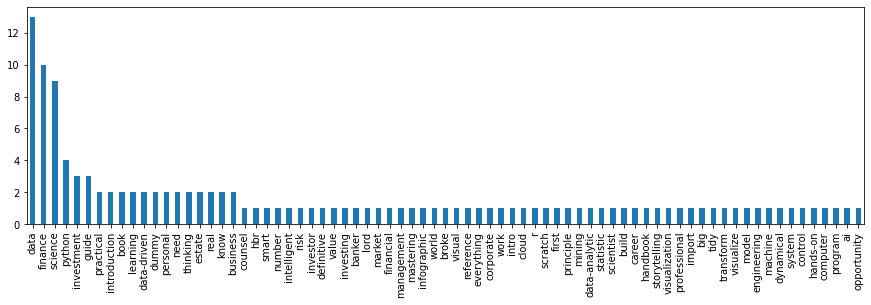

In [13]:
stop_words = set(stopwords.words('english') + list(string.punctuation))

is_valid = lambda t: t not in stop_words
tokenize = lambda t: nltk.word_tokenize(t.lower())
lemmatize = lambda t: lemmatizer.lemmatize(t)

tokens = list(chain(*[[lemmatize(t) for t in tokenize(t) if is_valid(t)] for t in text]))

frequencies = nltk.FreqDist(tokens)
s = pd.Series([v for _, v in frequencies.items()], frequencies.keys()).sort_values(ascending=False)
_ = s.plot(kind='bar', figsize=(15, 4))